# 1. Preparação do projeto

In [1]:
import joblib
import os
import urllib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.cluster import KMeans

RANDOM_STATE = 42

print('Matplot version: {}'.format(matplotlib.__version__))
print('Numpy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))

HD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/'
HD_URL = HD_ROOT + 'processed.cleveland.data'

DATA_PATH = os.path.join('data','raw')
DATA_FILE = 'hd.csv'
HD_DATA = os.path.join(DATA_PATH,DATA_FILE)

DEPLOY_PATH = os.path.join('..','model')
DEPLOY_FILE = 'finalized_model.sav'

Matplot version: 3.3.2
Numpy version: 1.19.2
Pandas version: 1.1.3


# 2. Recuperação dos dados

In [2]:
def download_data(data_url, data_path, data_file):
    os.makedirs(data_path, exist_ok = True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(data_url, local_path)

In [3]:
download_data(HD_URL, DATA_PATH, DATA_FILE)

In [4]:
def load_data(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    return pd.read_csv(local_path, header=None, names=['age','sex','cp','trestbps','chol','fbs',
                                                      'restecg','thalach','exang','oldpeak',
                                                      'slope','ca','thal','num'])

In [5]:
hd_data = load_data(DATA_PATH, DATA_FILE)

In [6]:
hd_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in hd_data.columns:
    # Compara se o tipo da coluna é object
    if hd_data[col].dtypes=='object':
    # Usa o LabelEnconder para transformar em um coluna numérica normalizada
        hd_data[col]=le.fit_transform(hd_data[col])
'''

"\nfrom sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\n\nfor col in hd_data.columns:\n    # Compara se o tipo da coluna é object\n    if hd_data[col].dtypes=='object':\n    # Usa o LabelEnconder para transformar em um coluna numérica normalizada\n        hd_data[col]=le.fit_transform(hd_data[col])\n"

In [9]:
num_ausentes = (hd_data[['age','sex','cp','trestbps','chol','fbs',
                         'restecg','thalach','exang','oldpeak',
                          'slope','ca','thal']] == '?').sum()
print('Quantidade de dados ausentes:\n{} '.format(num_ausentes))

Quantidade de dados ausentes:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64 


In [10]:
hd_data[['ca','thal']] = hd_data[['ca','thal']].replace('?',np.nan)
hd_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
hd_data[['ca','thal']] = imputer.fit_transform(
hd_data[['ca','thal']].values)

In [12]:
hd_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [13]:
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [14]:
hd_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [15]:
hd_data_nao_rotulado = hd_data.iloc[:,:-1]
hd_data_nao_rotulado.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


# K-Means

In [16]:
ks = range(1, 10)
inercias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(hd_data_nao_rotulado)
    inercias.append(model.inertia_)
    print(k ,model.inertia_)

1 1088520.8838068573
2 604625.4466617504
3 472573.76495758095
4 392123.6312752194
5 333858.0340230402
6 293900.46874621784
7 269181.45720779087
8 247097.02352415907
9 224840.97039325192


([<matplotlib.axis.XTick at 0x1e685a14370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

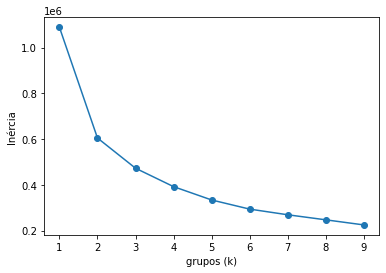

In [17]:
_ = plt.plot(ks, inercias, '-o')
plt.xlabel('grupos (k)')
plt.ylabel('Inércia')
plt.xticks(ks)

In [18]:
hd_data['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [19]:
model = KMeans(n_clusters=4)
model.fit(hd_data_nao_rotulado)
grupos = model.predict(hd_data_nao_rotulado)

print(grupos)

[1 0 1 1 2 1 1 0 1 2 2 0 1 1 2 2 1 1 0 1 2 0 0 1 2 1 0 1 1 2 1 1 0 1 1 1 2
 0 0 1 1 2 0 2 0 1 2 1 3 2 2 2 0 1 1 1 1 2 1 2 0 2 2 0 2 0 2 1 0 1 1 1 1 1
 2 0 1 0 1 0 2 1 0 0 0 1 1 2 1 1 0 2 1 2 1 1 1 1 2 1 1 2 0 1 2 0 2 1 1 2 0
 1 2 0 1 2 2 2 0 1 1 3 1 2 0 1 0 1 1 2 1 1 2 1 2 1 2 0 2 1 1 0 2 0 1 1 0 1
 0 0 0 1 3 0 1 0 0 0 0 0 2 0 2 1 1 2 1 0 0 2 0 1 1 3 2 0 1 2 0 1 1 3 1 0 0
 2 1 1 0 1 2 0 1 0 2 0 1 1 1 0 1 0 2 0 2 0 1 2 1 1 2 1 2 1 1 2 2 1 0 1 1 1
 2 0 1 2 2 0 2 2 2 0 2 1 2 0 0 1 1 0 1 0 1 1 2 1 1 0 2 2 2 2 1 0 0 2 1 2 1
 1 1 0 1 1 2 0 2 2 1 2 2 1 0 2 2 1 0 1 1 2 0 1 2 2 2 0 1 1 1 1 2 0 2 2 2 2
 2 1 1 2 2 1 2]


In [20]:
# sugestão: TSNE
xs = hd_data.iloc[:,0]
ys = hd_data.iloc[:,4]
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,4]

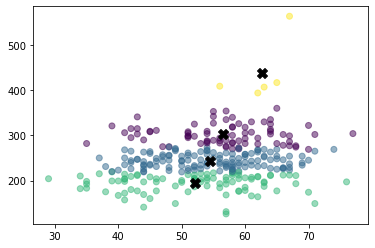

In [21]:
_ = plt.scatter(xs, ys, c=grupos, alpha=.5)
_ = plt.scatter(centroids_x, centroids_y, c='black', marker='X', s=100)

In [22]:
df = pd.DataFrame({'grupos':grupos, 'num':hd_data['num']})
ct = pd.crosstab(df['grupos'], df['num'])
print(ct)

num      0   1   2   3  4
grupos                   
0       31  17  13  13  4
1       75  25  13  10  4
2       55  13   9  12  4
3        3   0   1   0  1


# Agrupamento Hierarquico

In [23]:
def load_data_hierar(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    return pd.read_csv(local_path, index_col=0, header=None, names=['age','sex','cp','trestbps','chol','fbs',
                                                      'restecg','thalach','exang','oldpeak',
                                                      'slope','ca','thal','num'])

In [24]:
hd_data_hierar = load_data_hierar(DATA_PATH, DATA_FILE)

In [25]:
hd_data_hierar.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,,,,,,,,,,,,,
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [26]:
hd_data_hierar_transpose = hd_data.transpose()

In [27]:
hd_data_hierar_transpose.head()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,63.0,67.0,67.0,37.0,41.0,56.0,62.0,57.0,63.0,53.0,...,63.0,63.0,41.0,59.0,57.0,45.0,68.0,57.0,57.0,38.0
sex,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
cp,1.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,...,4.0,4.0,2.0,4.0,4.0,1.0,4.0,4.0,2.0,3.0
trestbps,145.0,160.0,120.0,130.0,130.0,120.0,140.0,120.0,130.0,140.0,...,140.0,124.0,120.0,164.0,140.0,110.0,144.0,130.0,130.0,138.0
chol,233.0,286.0,229.0,250.0,204.0,236.0,268.0,354.0,254.0,203.0,...,187.0,197.0,157.0,176.0,241.0,264.0,193.0,131.0,236.0,175.0


In [28]:
from sklearn.preprocessing import normalize
hd_data_norm = normalize(hd_data_hierar_transpose)
hd_data_norm

array([[0.0655879 , 0.06975221, 0.06975221, ..., 0.05934143, 0.05934143,
        0.03956095],
       [0.0696733 , 0.0696733 , 0.0696733 , ..., 0.0696733 , 0.        ,
        0.0696733 ],
       [0.01740513, 0.06962051, 0.06962051, ..., 0.06962051, 0.03481026,
        0.05221539],
       ...,
       [0.        , 0.15022407, 0.10014938, ..., 0.05007469, 0.05007469,
        0.03366225],
       [0.06742073, 0.03371036, 0.07865752, ..., 0.07865752, 0.03371036,
        0.03371036],
       [0.        , 0.07443229, 0.03721615, ..., 0.11164844, 0.03721615,
        0.        ]])

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
mesclagens = linkage(hd_data_norm, method='single')
mesclagens

array([[ 0.        ,  3.        ,  0.17868657,  2.        ],
       [ 7.        , 14.        ,  0.20513122,  3.        ],
       [ 4.        , 15.        ,  0.22944961,  4.        ],
       [ 2.        , 16.        ,  0.31947668,  5.        ],
       [10.        , 17.        ,  0.37202206,  6.        ],
       [12.        , 18.        ,  0.38849711,  7.        ],
       [ 1.        , 19.        ,  0.55759221,  8.        ],
       [ 9.        , 20.        ,  0.66712095,  9.        ],
       [ 6.        , 21.        ,  0.75393173, 10.        ],
       [13.        , 22.        ,  0.75513904, 11.        ],
       [11.        , 23.        ,  0.78877578, 12.        ],
       [ 8.        , 24.        ,  0.85030858, 13.        ],
       [ 5.        , 25.        ,  1.09234683, 14.        ]])

In [30]:
nomes = list(hd_data_hierar_transpose.index)

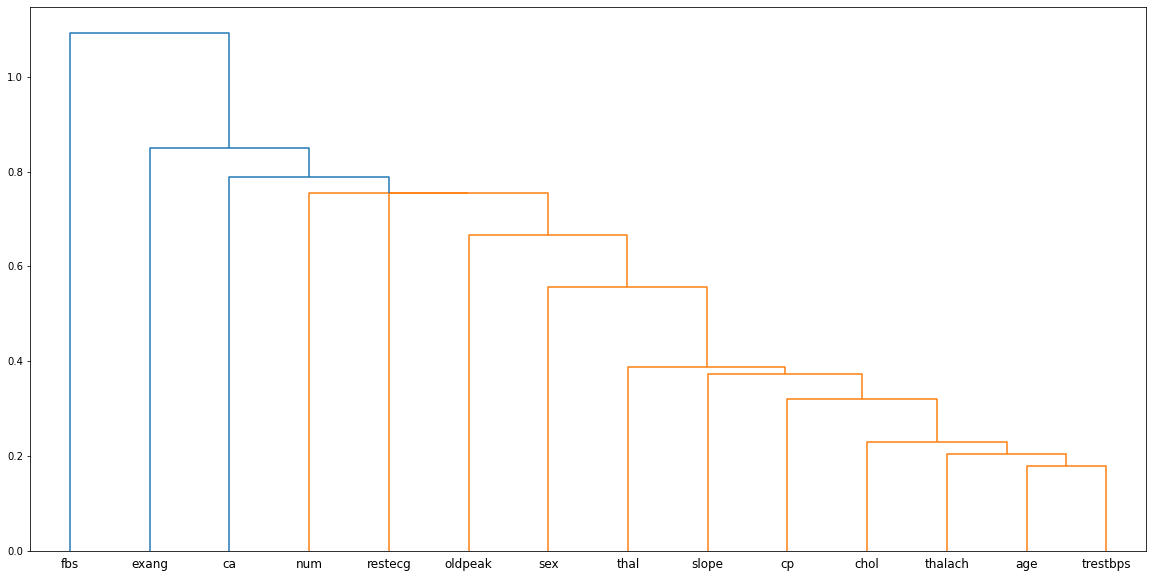

In [31]:
plt.figure(figsize=(20,10))
_ = dendrogram(mesclagens, labels=nomes, leaf_font_size=12, truncate_mode='level')

# DBSCAN

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

hd_data_norm2 = normalize(hd_data)
hd_data_norm2

X = StandardScaler().fit_transform(hd_data_nao_rotulado)
dbscan = DBSCAN(eps=3).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

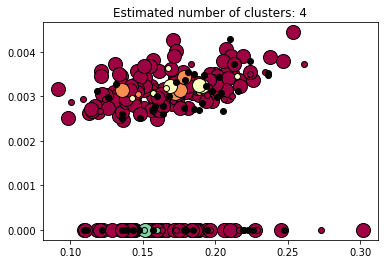

In [36]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Cor preta usada para ruidos.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = hd_data_norm2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = hd_data_norm2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Conclusão

Neste caso de aplicação escolheria o agrupamento hierárquico. O K-Means trouxe resultados que vão muito para as laterais o que causam muitas variações e não ficam de forma perfeitas. O DBScan acabou tendo ruído e uma predominância muito grande de um grupo de cluster.

O agrupamento hierárico mostrar como principal caracaterística para decisão fbs, exang e ca, sendo, fbs = açucar no sangue em jejum, angina induzida por exercício e números de vasos principais. Podemos perceber que são dados bem importantes para saber se o coração está ou não está com algum problema.